# (BoW) Bag of Words 

Bag of Words (BoW) is a simple and widely used technique in Natural Language Processing (NLP) for text representation. It converts text into numerical feature vectors so that machine learning algorithms can work with it.

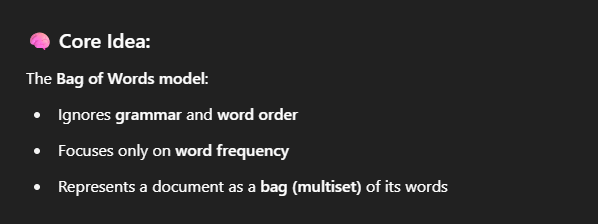

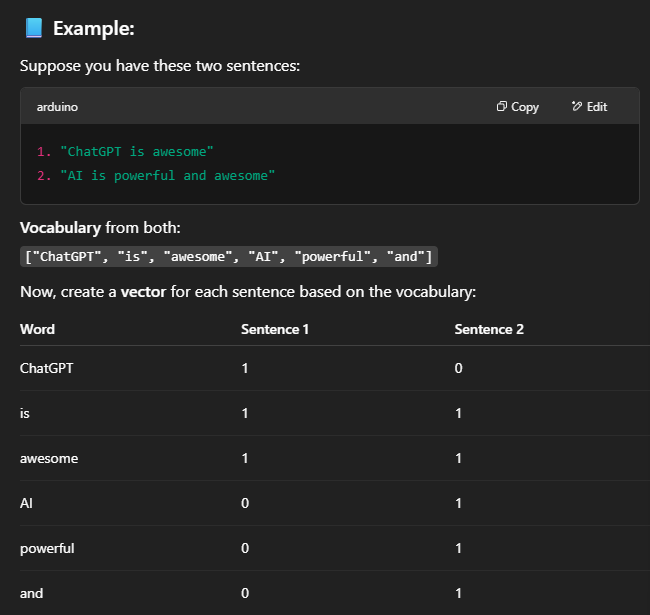

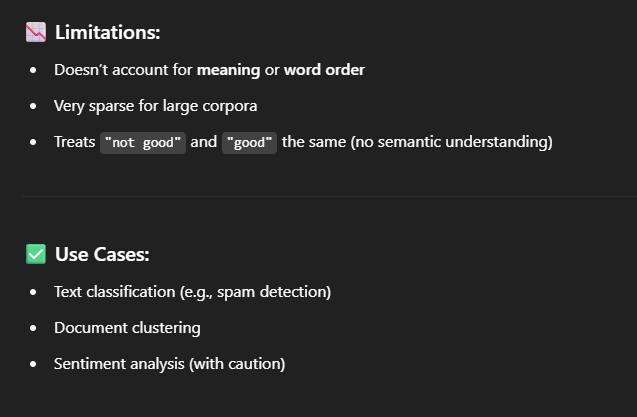

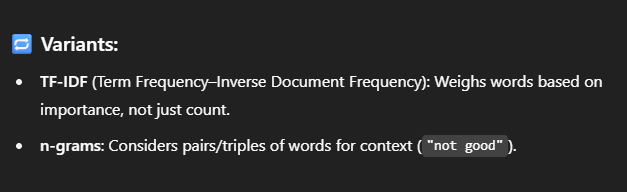

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


# Define the Datset

df = pd.read_csv(r"C:\Users\admin\Downloads\spam (1).csv")
print(df.head())
print('\nShape :',df.shape)



# To see the count of each category

Values = df['Category'].value_counts()
print('\n', Values)


# Create a column to classify

df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
print('\n', df.head())


# Split the Dataset to Test & Train

x_train,x_test,y_train,y_test = train_test_split(df.Message, df.spam, train_size = 0.8) 


# Create bag of words representation using CountVectorizer

v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:2]


# Train the naive bayes model

model = MultinomialNB()
model.fit(x_train_count, y_train)


# Test the model

emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
] 
emails_count = v.transform(emails)
Pred = model.predict(emails_count)
print('\nPreidcted Email :', Pred)


# Calculate the accuracy of the model

x_test_count = v.transform(x_test)
score = model.score(x_test_count, y_test)*100
print('\nScore :', score)


# Evaluate Performance

y_pred = model.predict(x_test_count)
print(classification_report(y_test, y_pred))



  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Shape : (5572, 2)

 Category
ham     4825
spam     747
Name: count, dtype: int64

   Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

Preidcted Email : [0 1]

Score : 98.29596412556054
              precision    recall  f1-score   support

           0       0.99      